In [ ]:
from astroquery.mast import Observations

postcard_obs = Observations.query_criteria(provenance_name="EVEREST",
                                           target_name="ktwo211315836", 
                                           obs_collection="HLSP")




#print(postcard_obs["dataURL"])
#print(Observations.get_product_list(postcard_obs)["productFilename"])
if len(postcard_obs) > 0:
    product_list = Observations.get_product_list(postcard_obs)
    extension = ["_dvs-0.png", "_dvs-1.png"]
    results = Observations.download_products(product_list, extension=extension,
                                             )


In [ ]:
#pd.options.display.max_rows = 4000
from astroquery.mast import Observations

obs_table = Observations.query_criteria(dataproduct_type=["image"],
                                         proposal_pi="Osten*",
                                         s_dec=[43.5,45.5])

print(obs_table[0]['target_name'])

In [ ]:
postcard_obs = Observations.query_criteria(
                                           target_name="ktwo202059070", 
                                           )

print(postcard_obs)

In [1]:
from astroquery.mast import Observations
from astropy.io import fits
from astropy.table import Table
import numpy as np

with fits.open('mastDownload/HLSP/hlsp_everest_k2_llc_211359660-c05_kepler_v2.0_lc/hlsp_everest_k2_llc_211359660-c05_kepler_v2.0_lc.fits') as hdu:
    asn_table = Table(hdu[1].data)

print(asn_table[0])
'''
FRAW = Raw version of plot
FLUX = The corrected version
'''
x = asn_table['CADN']
y = asn_table['FLUX']

# Convert y to np.arr
yArr = np.asarray(y)
xArr = np.asarray(x)
print(yArr)

  CADN          FLUX               FRAW             FRAW_ERR      QUALITY        TIME              FCOR        CBV01       CBV02              CBV03             CBV04              CBV05              CBV06       
-------- ------------------ ------------------ ------------------ ------- ----------------- ------------------ ----- ------------------ ----------------- ------------------ ------------------ ------------------
107552.0 249655.37765562534 250727.61977005005 14.990184868934408  524288 2306.610862680973 250995.41363371772   1.0 -1.503210915327308 2.942271358856924 4.3781131420190516 0.7523203368825048 -2.015849338479818
[249655.37765563 249659.84570575 249623.96553028 ... 250632.56827446
 250543.19960487 250643.73902108]


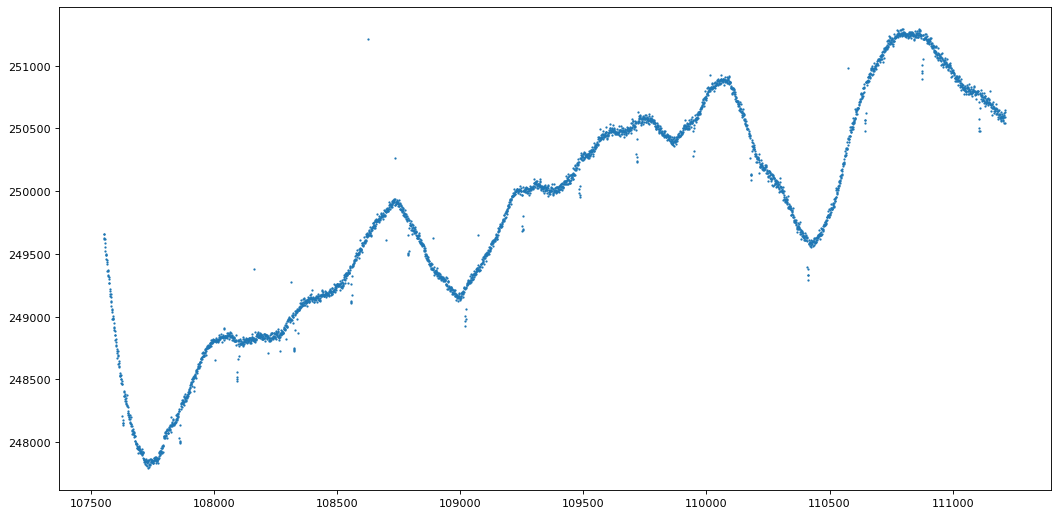

In [6]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x,y,s = 1 )

In [3]:
import lightkurve as lk
from astropy.timeseries import BoxLeastSquares
import numpy as np
import astropy.units as u

<class 'numpy.ndarray'>
<class 'astropy.table.column.Column'>


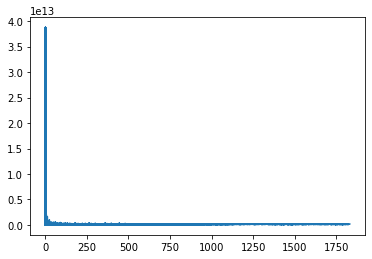

In [4]:
t = np.random.uniform(0, len(x), 2000)
y = np.ones_like(t) - 0.1*((t%3)<0.2) + 0.01*np.random.randn(len(t))
print(type(y))
print(type(x))
model = BoxLeastSquares(xArr, yArr, dy=0.01)
periodogram = model.autopower(0.2)
plt.plot(periodogram.period, periodogram.power)  

In [ ]:
t = np.random.uniform(0, len(x), 2000)
model = BoxLeastSquares(xArr, yArr, dy=0.01)
periodogram = model.autopower(0.2)
plt.plot(periodogram.period, periodogram.power)  

In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
search_result = lk.search_lightcurvefile('EPIC 211359660')
search_result

#,observation,target_name,productFilename,distance
0,K2 Campaign 5,ktwo211359660,ktwo211359660-c05_llc.fits,0.0
1,K2 Campaign 18,ktwo211359660,ktwo211359660-c18_llc.fits,0.0


In [54]:
lc_collection = search_result[:1].download_all()
lc_collection

LightCurveFileCollection of 1 objects:
	EPIC 211359660 (1 KeplerLightCurveFiles) Campaigns: 5

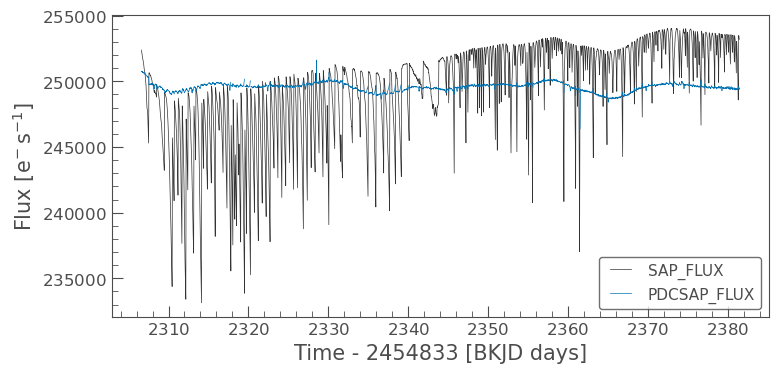

In [55]:
lc_collection[0].plot()

KeplerLightCurveFile(ID: 211359660)
<class 'lightkurve.lightcurve.KeplerLightCurve'>


F:\Anaconda\envs\astroProject\lib\site-packages\lightkurve\collections.py:209: LightkurveWarning: Stitching a `LightCurveFileCollection` which contains both SAP and PDCSAP_FLUX. Using PDCSAP_FLUX. You can remove this warning by explicitely using `LightCurveFileCollection.PDCSAP_FLUX.stitch()`.
  warnings.warn("Stitching a `LightCurveFileCollection` which contains "


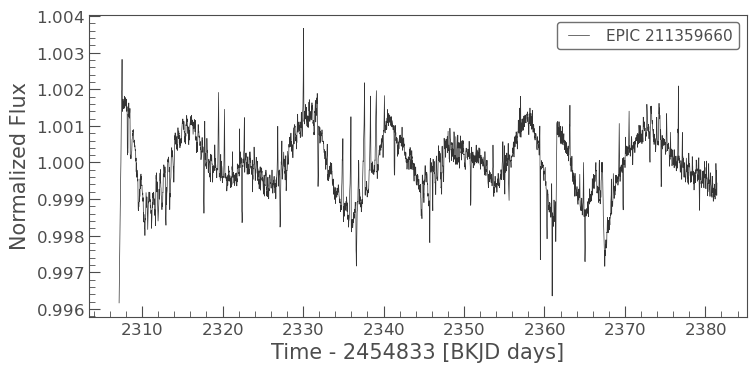

In [56]:
print((lc_collection[0]))
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();
print(type(lc))

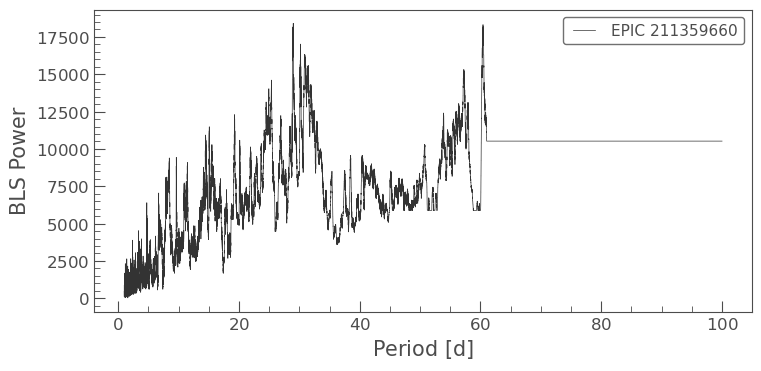

In [60]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 100, 200000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=10000);
bls.plot();

In [61]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 28.99189496 d>

In [62]:
# Create a cadence mask using the BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

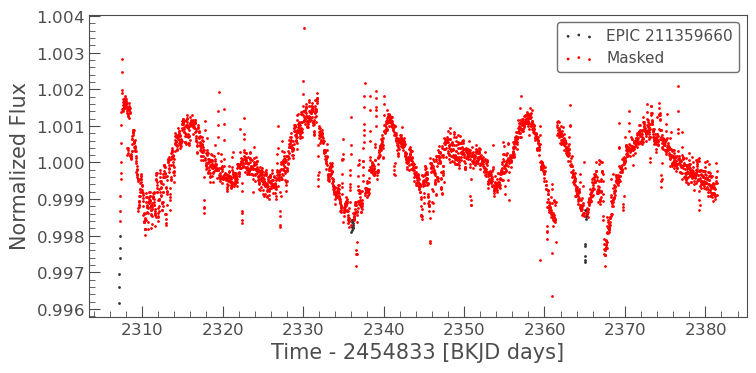

In [63]:
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter();
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked');